### ML - A way such that we give enough data to train the model to predict the unknown data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")    

In [3]:
df.head

<bound method NDFrame.head of           Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinde

In [4]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## Dropping unnecesssary Columns

In [5]:
df.drop(['Engine Fuel Type', 'Market Category','Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis =1, inplace=True)

## Renaming columns

In [6]:
#df.rename(columns= {'Transmission Type':'Transmission', "Driven_Wheels":"Drive_Mode", "city mpg":"MPG-C", "MSRP":"Price"})
df.rename(columns= {'Transmission Type':'Transmission', "Driven_Wheels":"Drive_Mode", "city mpg":"MPG-C", "MSRP":"Price"})

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission,Drive_Mode,highway MPG,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


### Finding and removing duplicate rows

In [7]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape


(989, 10)

In [8]:
df.drop_duplicates(inplace = True)


In [9]:
df.shape

(10925, 10)

In [10]:
df.count()

Make                 10925
Model                10925
Year                 10925
Engine HP            10856
Engine Cylinders     10895
Transmission Type    10925
Driven_Wheels        10925
highway MPG          10925
city mpg             10925
MSRP                 10925
dtype: int64

### Finding and removing Null value rows 

In [11]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()


Make                 0
Model                0
Year                 0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
highway MPG          0
city mpg             0
MSRP                 0
dtype: int64

In [14]:
df.count()

Make                 10827
Model                10827
Year                 10827
Engine HP            10827
Engine Cylinders     10827
Transmission Type    10827
Driven_Wheels        10827
highway MPG          10827
city mpg             10827
MSRP                 10827
dtype: int64

In [15]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
highway MPG            int64
city mpg               int64
MSRP                   int64
dtype: object

### Finding IQR and analysing Box plots

In [16]:
Q1= df['Year'].quantile(0.25)
Q3 = df['Year'].quantile(0.75)

IQR = Q3-Q1

print(IQR)

9.0


In [17]:
Q1= df['MSRP'].quantile(0.25)
Q3 = df['MSRP'].quantile(0.75)

IQR = Q3-Q1

print(IQR)

21327.5


<Axes: xlabel='MSRP'>

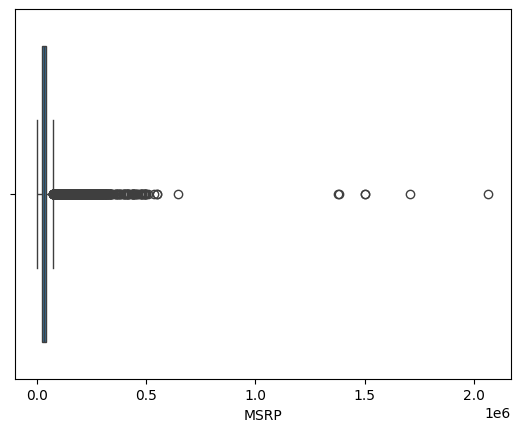

In [18]:
sns.boxplot(x=df['MSRP'])

Text(0, 0.5, 'Number of cars')

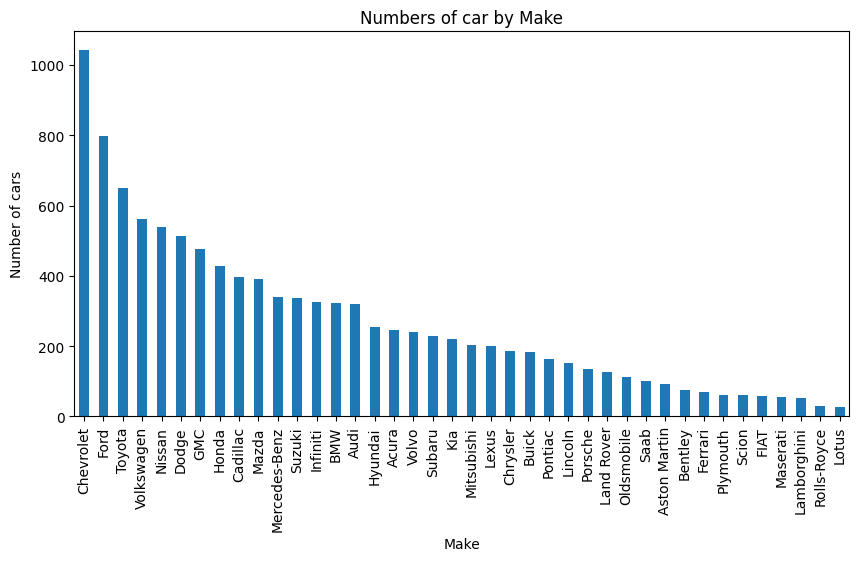

In [19]:

df.Make.value_counts().nlargest(40).plot(kind='bar', figsize = (10,5))
plt.title("Numbers of car by Make")
plt.xlabel("Make")
plt.ylabel("Number of cars")

### Correlation

In [20]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

newdf

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,46120
11910,2012,300.0,6.0,23,16,56670
11911,2012,300.0,6.0,23,16,50620
11912,2013,300.0,6.0,23,16,50920


,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
Engine HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Engine Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
highway MPG,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
city mpg,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
MSRP,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


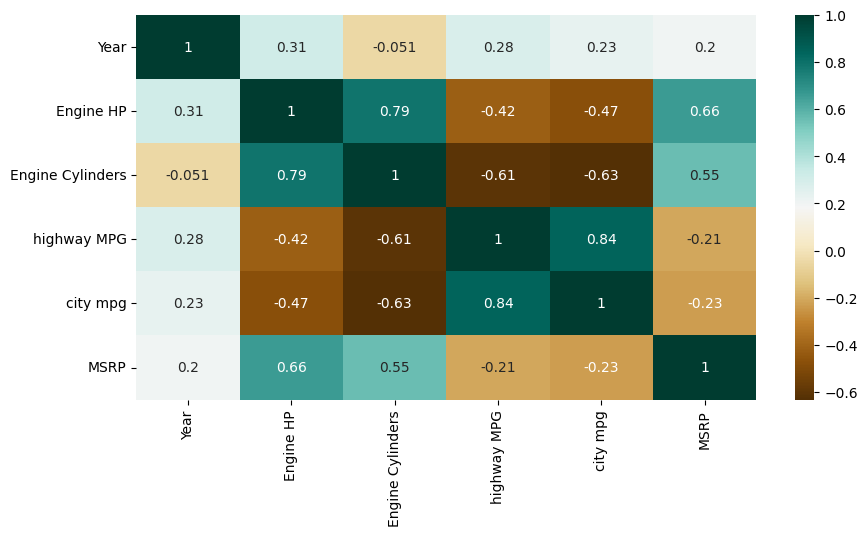

In [21]:
plt.figure(figsize =(10,5))
c = newdf.corr()
sns.heatmap(c, cmap="BrBG", annot = True)
c

### Scatter plot

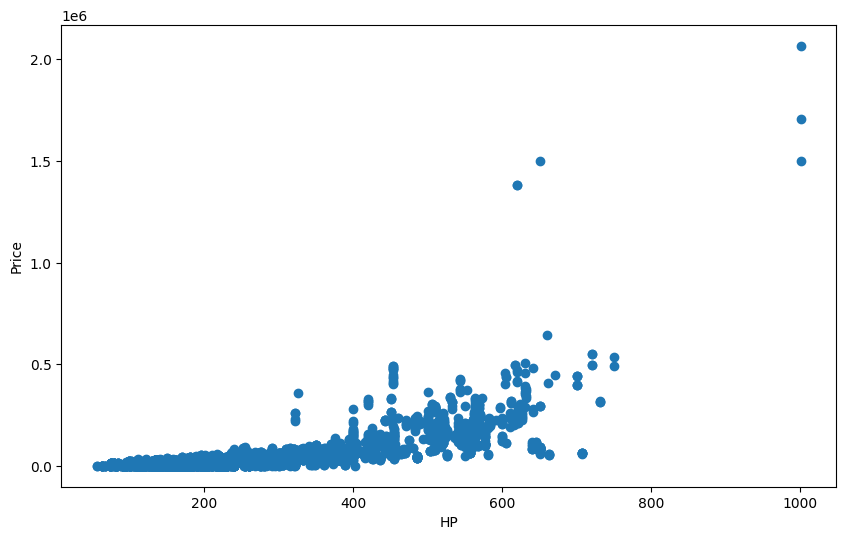

In [22]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df["Engine HP"], df["MSRP"])
ax.set_xlabel("HP")
ax.set_ylabel("Price")
plt.show()

### loc, iloc

In [25]:
display_df = df.loc[df['Make'].isin(['BMW'])]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10827 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               10827 non-null  object 
 1   Model              10827 non-null  object 
 2   Year               10827 non-null  int64  
 3   Engine HP          10827 non-null  float64
 4   Engine Cylinders   10827 non-null  float64
 5   Transmission Type  10827 non-null  object 
 6   Driven_Wheels      10827 non-null  object 
 7   highway MPG        10827 non-null  int64  
 8   city mpg           10827 non-null  int64  
 9   MSRP               10827 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.4+ KB


In [27]:
df.iloc[0:5, 0:5]

,Make,Model,Year,Engine HP,Engine Cylinders
0,BMW,1 Series M,2011,335.0,6.0
1,BMW,1 Series,2011,300.0,6.0
2,BMW,1 Series,2011,300.0,6.0
3,BMW,1 Series,2011,230.0,6.0
4,BMW,1 Series,2011,230.0,6.0


In [34]:
agg_df = df.groupby('Make').agg(Totalsales=('MSRP', 'sum'), Averagesales=('MSRP', 'mean')).reset_index()

In [37]:
print(agg_df)

             Make  Totalsales  Averagesales
0           Acura     8631522  3.508749e+04
1      Alfa Romeo      308000  6.160000e+04
2    Aston Martin    18029235  1.981235e+05
3            Audi    17516293  5.473842e+04
4             BMW    20140669  6.216256e+04
5         Bentley    18290530  2.471693e+05
6         Bugatti     5271671  1.757224e+06
7           Buick     5504496  2.991574e+04
8        Cadillac    22321833  5.636827e+04
9       Chevrolet    30846878  2.957515e+04
10       Chrysler     4993194  2.699024e+04
11          Dodge    13117377  2.556994e+04
12           FIAT     1289760  2.223724e+04
13        Ferrari    16437100  2.382188e+05
14           Ford    23103419  2.895165e+04
15            GMC    15624049  3.289273e+04
16        Genesis      139850  4.661667e+04
17         HUMMER      619895  3.646441e+04
18          Honda    11420749  2.662179e+04
19        Hyundai     6445902  2.537757e+04
20       Infiniti    13982009  4.288960e+04
21            Kia     5591430  2

['Toyota', 'BMW', 'Ford']


In [23]:
!pip install scikit-learn

### Adding new column as a part of feature engineering

In [24]:
df['cylinder_doors'] = df['Engine Cylinders'] * df['Number of Doors']

KeyError: 'Number of Doors'

In [ ]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,cylinder_doors
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,12.0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,12.0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,12.0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,12.0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120,24.0
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670,24.0
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620,24.0
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920,24.0


### Created New Column indicating milage is good or bad

In [ ]:
def get_milage(city_mpg, highway_mpg):
    if (city_mpg + highway_mpg) > 45:
        return 'Good'
    else:
        return 'Bad'
    

#df["get_milage"] = df('city mpg', 'highway MPG').apply(get_milage)
df["get_milage"] = df.apply(lambda df: get_milage(df['city mpg'], df['highway MPG']), axis =1)

In [ ]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,cylinder_doors,get_milage
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,12.0,Bad
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,12.0,Good
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,12.0,Good
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,12.0,Good
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,12.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120,24.0,Bad
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670,24.0,Bad
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620,24.0,Bad
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920,24.0,Bad


In [ ]:
!pip install pyodbc

In [ ]:
agg_df = df.groupby('Vehicle Style').agg(
    Avg_mpg = ('city mpg', 'sum')
)

In [ ]:
agg_df

,Avg_mpg
Vehicle Style,
2dr Hatchback,12092
2dr SUV,1999
4dr Hatchback,22276
4dr SUV,45944
Cargo Minivan,1338
Cargo Van,1210
Convertible,14315
Convertible SUV,586
Coupe,21504
